In [249]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [250]:
datadir = 'resources/'
image = cv2.cvtColor(cv2.imread(datadir+'result_img.jpg'), cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(cv2.imread(datadir+'merchandise/spice.jpg'), cv2.COLOR_BGR2GRAY)

In [251]:
def single_match(template, image):
    result = cv2.matchTemplate(image, template,
        cv2.TM_CCOEFF_NORMED)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
    return maxLoc

In [252]:
pivot = single_match(template, image)

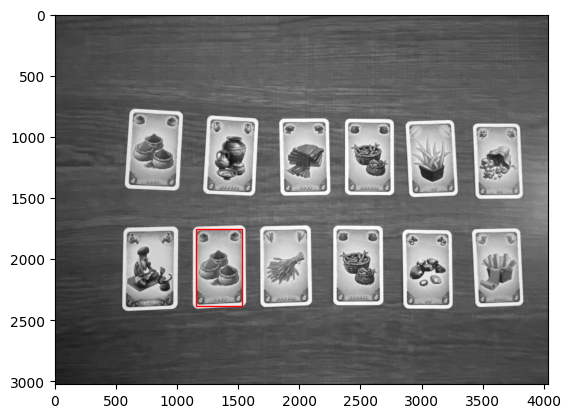

In [253]:
# Visualization
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')
rect = patches.Rectangle((pivot[0], pivot[1]), template.shape[1], template.shape[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

In [254]:
def match_helper(template, image, threshold):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    (yCoords, xCoords) = np.where(result >= threshold)
    return zip(xCoords, yCoords)

In [255]:
# We will implement non-maximum suppression in future
def remove_duplicate(coords_zip, threshold):
    coords_dict = set()
    for (x,y) in coords_zip:
        flag = True
        for (cx, cy) in coords_dict:
            if np.linalg.norm(np.array(x,y) - np.array(cx, cy)) < threshold:
                flag = False
        if flag:
            coords_dict.add((x, y))
    return coords_dict

In [256]:
def multiple_match(template, image):
    return remove_duplicate(match_helper(template, image, 0.7), template.shape[0]/2)

In [257]:
res = multiple_match(template, image)

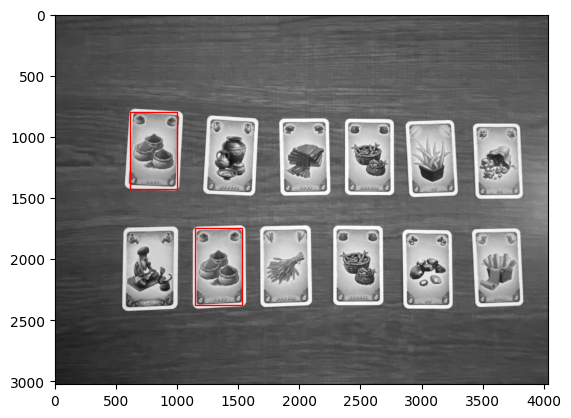

In [258]:
# Visualization
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')
for (x, y) in res:
    rect = patches.Rectangle((x, y), template.shape[1], template.shape[0], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [259]:
print(len(res))

2
